In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Read the data in pandas
inp0= pd.read_csv("Attribute+DataSet.csv")
inp1= pd.read_csv("Dress+Sales.csv")

In [3]:
inp0.head(5)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


In [4]:
inp0.dtypes

Dress_ID            int64
Style              object
Price              object
Rating            float64
Size               object
Season             object
NeckLine           object
SleeveLength       object
Material           object
FabricType         object
Decoration         object
Pattern Type       object
Recommendation      int64
dtype: object

In [5]:
inp0.Price.value_counts()

Average      240
Low          165
Medium        30
High          21
very-high     21
Name: Price, dtype: int64

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


In [6]:
inp0.Recommendation.value_counts()

0    274
1    205
Name: Recommendation, dtype: int64

In [7]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [12]:
def custom_size(size):
    if size=="M":
        return "Medium"
    elif size=="L":
        return "Large"
    elif size=="XL":
        return "Extra Large"
    elif size.lower()=="free":
        return "Free"
    elif size=="S":
        return "Small"
    elif size=="s":
        return "Small"
    elif size=="small":
        return "Small"
    else:
        return size

In [13]:
inp0.Size.value_counts()

inp0.Size_1 = inp0.apply(lambda x:custom_size(x['Size']),axis=1 )

/Users/na250047/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
# Print the information about the attributes of inp0 and inp1.
inp0.Size_1.value_counts()

Medium         171
Free           165
Large           93
Small           36
Extra Large     14
dtype: int64

In [18]:
inp0.Size_1.value_counts(normalize=True) * 100

Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra Large     2.922756
dtype: float64

In [ ]:
inp0.Size= inp0.Size.replace(['S', 'small', 's'], "Small")

inp0.Size= inp0.Size.replace('free', "Free")

inp0.Size= inp0.Size.replace('M', "Medium")

inp0.Size= inp0.Size.replace('L', "Large") 

inp0.Size= inp0.Size.replace('XL', "Extra large")

In [21]:
inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,24-09-2013,26-09-2013,28-09-2013,30-09-2013,10-02-2013,10-04-2013,10-06-2013,10-08-2013,10-10-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119,3204,...,3554,3624.0,3706,3746.0,3795.0,3832.0,3897,3923.0,3985.0,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558,1756,...,2710,2942.0,3258,3354.0,3475.0,3654.0,3911,4024.0,4125.0,4277
2,1.190381e+09,6,7,7,7,8,8,9,10,10,...,11,11.0,11,11.0,11.0,11.0,11,11.0,11.0,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723,1746,...,1878,1892.0,1914,1924.0,1929.0,1941.0,1952,1955.0,1959.0,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638,1655,...,2032,2156.0,2252,2312.0,2387.0,2459.0,2544,2614.0,2693.0,2736


### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [ ]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.


In [ ]:
# Print the value counts of each category in "Size" column.


### Impute/Remove Missing values

In [ ]:
# Print the null count of each variables of inp0 and inp1.


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [32]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1= pd.read_csv("Dress+Sales.csv")
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [33]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
inp1['22-09-2013']=inp1['22-09-2013'].astype('int64')

ValueError: invalid literal for int() with base 10: 'Orders'

In [34]:
inp1['22-09-2013']= inp1['22-09-2013'].replace('Orders', None) 

In [ ]:
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN

In [35]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
inp1['22-09-2013']=inp1['22-09-2013'].astype('int64')

In [36]:
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN

inp1.loc[inp1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN

inp1.loc[inp1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN

inp1.loc[inp1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN

inp1.loc[inp1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN

inp1.loc[inp1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN


/Users/na250047/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [38]:
# Convert the object type columns in "Dress Sales" into float type of data type.
inp1['09-12-2013']=inp1['09-12-2013'].astype('float64')
inp1['14-09-2013']=inp1['14-09-2013'].astype('float64')
inp1['16-09-2013']=inp1['16-09-2013'].astype('float64')
inp1['18-09-2013']=inp1['18-09-2013'].astype('float64')
inp1['20-09-2013']=inp1['20-09-2013'].astype('float64')
inp1['22-09-2013']=inp1['22-09-2013'].astype('float64')

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [39]:
# Print the null percetange of each column of inp1.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  479 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [41]:
inp1.isna().mean().round(4) * 100

Dress_ID       0.00
29-08-2013     0.00
31-08-2013     0.00
09-02-2013     0.00
09-04-2013     0.00
09-06-2013     0.00
09-08-2013     0.00
09-10-2013     0.00
09-12-2013     0.21
14-09-2013     0.21
16-09-2013     0.21
18-09-2013     0.21
20-09-2013     0.21
22-09-2013     0.00
24-09-2013     0.00
26-09-2013    46.35
28-09-2013     0.00
30-09-2013    53.65
10-02-2013    54.07
10-04-2013    53.86
10-06-2013     0.00
10-08-2013    53.24
10-10-2013    53.24
10-12-2013     0.00
dtype: float64

In [42]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
inp1= inp1.drop(["26-09-2013"] , axis= 1)

inp1= inp1.drop(["30-09-2013"] , axis= 1)

inp1= inp1.drop(["10-02-2013"] , axis= 1)

inp1= inp1.drop(["10-04-2013"] , axis= 1)

inp1= inp1.drop(["10-08-2013"] , axis= 1)

inp1= inp1.drop(["10-10-2013"] , axis= 1)


In [43]:
inp1.head()

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,16-09-2013,18-09-2013,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,3277.0,3321.0,3386.0,3479.0,3554,3706,3897,4048
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,1878.0,1985.0,2106.0,2454.0,2710,3258,3911,4277
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,10.0,10.0,10.0,11.0,11,11,11,11
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,1783.0,1796.0,1812.0,1845.0,1878,1914,1952,1963
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,1681.0,1743.0,1824.0,1919.0,2032,2252,2544,2736


You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [44]:
# Create the four seasons columns in inp1, according to the above criteria.
inp1['Summer']=inp1['29-08-2013']+inp1['31-08-2013']+inp1['09-06-2013']+inp1['09-08-2013']+inp1['10-06-2013']+inp1['10-08-2013']

0      4388
1       426
2        13
3      2133
4      2171
       ... 
474       0
475       0
476       0
477       0
478       0
Length: 479, dtype: int64

In [51]:
inp2 = inp1.reindex(columns = inp1.columns.tolist() + ['Summer','Autumn','Winter','Spring'])

In [52]:

for col in inp2.columns: 
    if('08-2013' in col or '06-2013' in col or '07-2013' in col):
        inp2['Summer']+=inp2[col]
    elif ('09-2013' in col or '10-2013' in col or '11-2013' in col):
        inp2['Autumn']+=inp2[col]
    elif ('12-2013' in col or '-01-' in col or '-02-' in col):
        inp2['Winter']+=inp2[col]
    elif ('-03-' in col or '-04-' in col or '-05-' in col):
        inp2['Spring']+=inp2[col]

TypeError: '<' not supported between instances of 'str' and 'int'

In [53]:
for col in inp2.columns: 
    if('08-2013' in col or '06-2013' in col or '07-2013' in col):
        print('Summer:'+col)
    elif ('09-2013' in col or '10-2013' in col or '11-2013' in col):
        print('Autumn:'+col)
    elif ('12-2013' in col or '-01-' in col or '-02-' in col):
        print('Winter:'+col)
    elif ('-03-' in col or '-04-' in col or '-05-' in col):
        print('Spring:'+col)

Summer:29-08-2013
Summer:31-08-2013
Winter:09-02-2013
Spring:09-04-2013
Summer:09-06-2013
Summer:09-08-2013
Autumn:09-10-2013
Winter:09-12-2013
Autumn:14-09-2013
Autumn:16-09-2013
Autumn:18-09-2013
Autumn:20-09-2013
Autumn:22-09-2013
Autumn:24-09-2013
Autumn:28-09-2013
Summer:10-06-2013
Winter:10-12-2013


In [54]:
inp1['Summer']=inp1['29-08-2013']+inp1['31-08-2013']+inp1['09-06-2013']+inp1['09-08-2013']+inp1['10-06-2013']

In [55]:
inp1['Autumn']=inp1['09-10-2013']+inp1['14-09-2013']+inp1['16-09-2013']+inp1['18-09-2013']+inp1['20-09-2013']+inp1['22-09-2013']+inp1['24-09-2013']+inp1['28-09-2013']

inp1['Winter']=inp1['09-02-2013']+inp1['09-12-2013']+inp1['10-12-2013']

inp1['Spring']=inp1['09-04-2013']



In [56]:
inp1.sum(axis=0)

Dress_ID      4.321739e+11
29-08-2013    9.488300e+04
31-08-2013    1.004830e+05
09-02-2013    1.070810e+05
09-04-2013    1.436000e+05
09-06-2013    1.459730e+05
09-08-2013    1.516200e+05
09-10-2013    1.533280e+05
09-12-2013    1.596930e+05
14-09-2013    1.627920e+05
16-09-2013    1.653180e+05
18-09-2013    1.678330e+05
20-09-2013    1.723510e+05
22-09-2013    1.769290e+05
24-09-2013    1.786380e+05
28-09-2013    1.866140e+05
10-06-2013    1.989480e+05
10-12-2013    2.079090e+05
Summer        6.919070e+05
Autumn        1.361593e+06
Winter        4.736400e+05
Spring        1.436000e+05
dtype: float64

In [ ]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
inp1['Spring'] = inp1.apply(lambda x: x['09-04-2013'], axis=1)

inp1['Summer'] = inp1.apply(lambda x: x['29-08-2013'] + x['31-08-2013']+ x['09-06-2013']+ x['09-08-2013']+ x['10-06-2013'], axis=1)

inp1['Winter'] = inp1.apply(lambda x: x['09-02-2013'] + x['09-12-2013']+ x['10-12-2013'], axis=1)

inp1['Autumn'] = inp1.apply(lambda x: x['09-10-2013'] + x['14-09-2013']+ x['16-09-2013']+ x['18-09-2013']+ x['20-09-2013']+ x['22-09-2013']+ x['24-09-2013']+ x['28-09-2013'], axis=1)

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [70]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [71]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               0
Rating              0
Size                0
Season              0
NeckLine            0
SleeveLength        0
Material          116
FabricType        250
Decoration        220
Pattern Type       98
Recommendation      0
Summer              0
Autumn              0
Winter              0
Spring              0
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.

In [72]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               0
Rating              0
Size                0
Season              0
NeckLine            0
SleeveLength        0
Material          116
FabricType        250
Decoration        220
Pattern Type       98
Recommendation      0
Summer              0
Autumn              0
Winter              0
Spring              0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [68]:
inp0

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,M,winter,o-neck,halfsleeve,acrylic,chiffon,NaN,striped,0
475,713391965,Casual,Low,4.7,M,Spring,o-neck,full,polyster,NaN,NaN,solid,1
476,532874347,Casual,Average,4.7,M,Summer,v-neck,full,cotton,NaN,lace,solid,1
477,655464934,Casual,Average,4.6,L,winter,boat-neck,sleevless,silk,broadcloth,applique,print,1


In [73]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
inp0 = inp0[~inp0.Price.isnull()]

inp0 = inp0[~inp0.Season.isnull()]

inp0 = inp0[~inp0.NeckLine.isnull()]

inp0 = inp0[~inp0.SleeveLength.isnull()]

inp0 = inp0[~inp0.Winter.isnull()]

inp0 = inp0[~inp0.Autumn.isnull()]

In [74]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
inp0.Material= inp0.Material.replace(np.nan, "Missing")

inp0.FabricType= inp0.FabricType.replace(np.nan, "Missing")

inp0.Decoration= inp0.Decoration.replace(np.nan, "Missing")

inp0['Pattern Type']= inp0['Pattern Type'].replace(np.nan, "Missing")

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [90]:
#correcting the spellings.

inp0['Decoration'].tolist()

['ruffles',
 'ruffles',
 'Missing',
 'embroidary',
 'bow',
 'Missing',
 'Missing',
 'beading',
 'Missing',
 'lace',
 'Missing',
 'lace',
 'Missing',
 'sashes',
 'lace',
 'sashes',
 'hollowout',
 'Missing',
 'Missing',
 'beading',
 'Missing',
 'pockets',
 'sequined',
 'lace',
 'Missing',
 'Missing',
 'Missing',
 'sashes',
 'bow',
 'ruffles',
 'applique',
 'ruffles',
 'bow',
 'Missing',
 'Missing',
 'Missing',
 'Missing',
 'lace',
 'button',
 'lace',
 'sashes',
 'applique',
 'Missing',
 'Missing',
 'lace',
 'lace',
 'ruffles',
 'Missing',
 'Missing',
 'Missing',
 'Missing',
 'hollowout',
 'sashes',
 'lace',
 'Missing',
 'Missing',
 'lace',
 'Missing',
 'bow',
 'Missing',
 'hollowout',
 'Missing',
 'sashes',
 'Missing',
 'beading',
 'applique',
 'Missing',
 'hollowout',
 'Missing',
 'Missing',
 'ruffles',
 'Missing',
 'lace',
 'Missing',
 'bow',
 'Missing',
 'Missing',
 'Missing',
 'Missing',
 'ruffles',
 'hollowout',
 'Missing',
 'Missing',
 'hollowout',
 'Missing',
 'beading',
 'Missing

In [91]:
#correcting the Spellings.

inp0.Season= inp0.Season.replace('Automn', "Autumn")

inp0.Season= inp0.Season.replace('spring', "Spring")

inp0.Season= inp0.Season.replace('winter', "Winter")

inp0.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")

inp0.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")

inp0.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")



## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


In [94]:
inp0

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,990559192,Brief,Average,4.7,M,Winter,o-neck,half sleeves,acrylic,chiffon,Missing,striped,0,203,565.0,144.0,60
468,713391965,Casual,Low,4.7,M,Spring,o-neck,full sleeves,polyster,Missing,Missing,solid,1,1478,3800.0,810.0,560
469,532874347,Casual,Average,4.7,M,Summer,v-neck,full sleeves,cotton,Missing,lace,solid,1,2005,5290.0,1214.0,734
470,655464934,Casual,Average,4.6,L,Winter,boat-neck,sleeve less,silk,broadcloth,applique,print,1,769,2117.0,516.0,254


In [95]:
inp0['TotalSales']= inp0.apply(lambda x: x['Summer'] + x['Autumn']+ x['Winter']+ x['Spring'], axis=1)
inp0.head()






,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,TotalSales
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899,26857.0,9658.0,2660,53074.0
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216,17311.0,6405.0,750,30682.0
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40,82.0,28.0,7,157.0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455,28091.0
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396,29456.0


In [96]:
inp0

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,TotalSales
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899,26857.0,9658.0,2660,53074.0
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216,17311.0,6405.0,750,30682.0
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40,82.0,28.0,7,157.0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455,28091.0
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396,29456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,990559192,Brief,Average,4.7,M,Winter,o-neck,half sleeves,acrylic,chiffon,Missing,striped,0,203,565.0,144.0,60,972.0
468,713391965,Casual,Low,4.7,M,Spring,o-neck,full sleeves,polyster,Missing,Missing,solid,1,1478,3800.0,810.0,560,6648.0
469,532874347,Casual,Average,4.7,M,Summer,v-neck,full sleeves,cotton,Missing,lace,solid,1,2005,5290.0,1214.0,734,9243.0
470,655464934,Casual,Average,4.6,L,Winter,boat-neck,sleeve less,silk,broadcloth,applique,print,1,769,2117.0,516.0,254,3656.0


In [97]:
inp_t = inp0[inp0.TotalSales<50000]

In [99]:
inp_t.Style.value_counts()

Casual      216
Sexy         63
party        48
cute         42
vintage      24
bohemian     23
work         17
Brief        17
sexy          7
Novelty       6
Flare         2
OL            1
fashion       1
Name: Style, dtype: int64

Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [105]:
t = inp0.groupby(by=['Style']).TotalSales.sum()


In [107]:
t.sort_values(ascending=True)

Style
OL              289.0
fashion         395.0
Flare          2089.0
Novelty       13286.0
bohemian      69117.0
work          93095.0
sexy          93964.0
Brief        139628.0
party        142041.0
vintage      180574.0
cute         361999.0
Sexy         452355.0
Casual      1103558.0
Name: TotalSales, dtype: float64

In [108]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
total_collection=inp0.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()
total_collection.sum(axis = 1)
total_collection[total_collection.sum(axis = 1)<50000]
inp0.replace(total_collection[total_collection.sum(axis=1)<50000].index, 'Others', inplace=True)


/Users/na250047/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [110]:
# Calculate the percentage of each categories in the "Style" variable.
inp0.Style.value_counts(normalize=True)

Casual      0.459746
Sexy        0.137712
party       0.101695
cute        0.091102
vintage     0.052966
bohemian    0.048729
work        0.036017
Brief       0.036017
Others      0.021186
sexy        0.014831
Name: Style, dtype: float64

In [111]:
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Winter,Spring,TotalSales
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899,26857.0,9658.0,2660,53074.0
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216,17311.0,6405.0,750,30682.0
2,1190380701,vintage,High,0.0,L,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40,82.0,28.0,7,157.0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213,14411.0,5012.0,1455,28091.0
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706,14676.0,5678.0,1396,29456.0


Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [ ]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.


In [ ]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.


Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [ ]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.


In [ ]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.


In [ ]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.


In [ ]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.


### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [115]:
print(inp0.Autumn.describe())

count      472.000000
mean      2863.860169
std       5037.366329
min          1.000000
25%        412.750000
50%       1335.000000
75%       3131.250000
max      55532.000000
Name: Autumn, dtype: float64


In [118]:
inp0.Autumn.quantile([0.99,1])

0.99    24112.3
1.00    55532.0
Name: Autumn, dtype: float64

In [119]:
inp0.Winter.quantile([0.99,1])

0.99     8975.69
1.00    20388.00
Name: Winter, dtype: float64

In [120]:
inp0.Spring.quantile([0.99,1])

0.99    2657.16
1.00    7374.00
Name: Spring, dtype: float64

In [121]:
inp0.Summer.quantile([0.99,1])

0.99    13971.5
1.00    35577.0
Name: Summer, dtype: float64

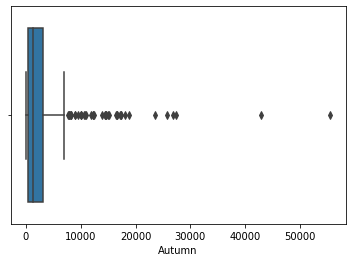

In [112]:
# Describe the numerical variale: "Autumn".
sns.boxplot(inp0.Autumn)
plt.show()

In [ ]:
# plot the boxplot of "Autumn" column.


Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [ ]:
# Find the maximum and 99th percentile of Winter season.


In [ ]:
# Find the maximum and 99th percentile of Summer season.


In [ ]:
# Find the maximum and 99th percentile of Spring season.


In [ ]:
# Find the maximum and 99th percentile of Autumn season.


## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [124]:
# Find the Mean of Ratings for each Price category.
inp0.groupby(["Price"])["Rating"].mean()

Price
Average      3.455042
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

In [125]:
inp0.groupby(["Style"])["Rating"].median()

Style
Brief       4.6
Casual      4.6
Others      0.0
Sexy        4.6
bohemian    4.6
cute        4.6
party       4.7
sexy        4.5
vintage     4.6
work        4.7
Name: Rating, dtype: float64

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [127]:
# Find the median of Ratings for each Style category.
inp0[inp0.Recommendation==1].groupby(["Style"])["Rating"].median()

Style
Brief       4.45
Casual      4.60
Others      2.10
Sexy        4.65
bohemian    4.80
cute        4.55
party       4.75
sexy        4.10
vintage     4.65
work        4.70
Name: Rating, dtype: float64

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [141]:
# Summer sale vs Recommendation.
inp0[inp0.Recommendation==1].Summer.mean()

1486.295

In [142]:
# Spring sale vs Recommendation.
inp0[inp0.Recommendation==1].Spring.mean()

306.85

In [143]:
# Autumn sale vs Recommendation.
inp0[inp0.Recommendation==1].Autumn.mean()

2893.97

In [144]:
# Winter sale vs Recommendation.
inp0[inp0.Recommendation==1].Winter.mean()

1011.695

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [145]:
# Size vs Recommendation.
inp0[inp0.Recommendation==1].Size.value_counts(normalize=True)

M       0.380
free    0.370
L       0.165
S       0.065
XL      0.020
Name: Size, dtype: float64

Size
L        33
M        76
S        13
XL        4
free     74
s         0
small     0
Name: Recommendation, dtype: int64

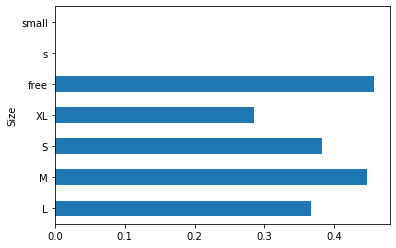

In [146]:
inp0.groupby(['Size'])['Recommendation'].mean().plot.barh()
inp0.groupby('Size')['Recommendation'].sum()


### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


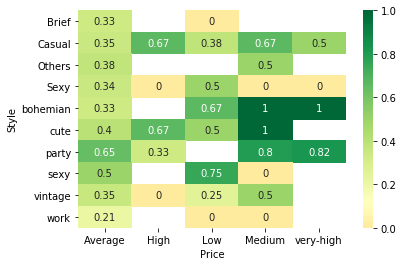

In [149]:
# plot the heat map of Style, price and Recommendation.
inp2_ = inp0[inp0.Recommendation==1]

res=pd.pivot_table(data=inp0, index="Style",columns="Price",values="Recommendation")
sns.heatmap(res,annot=True,cmap="RdYlGn",center=0.117)
plt.show()

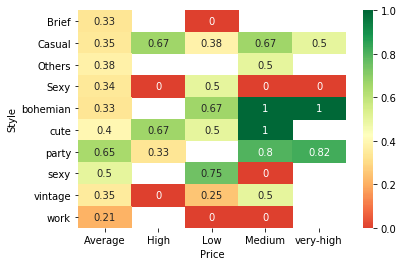

In [150]:
res = pd.pivot_table(data=inp0, index="Style", columns="Price", values="Recommendation")

sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)

plt.show()


Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


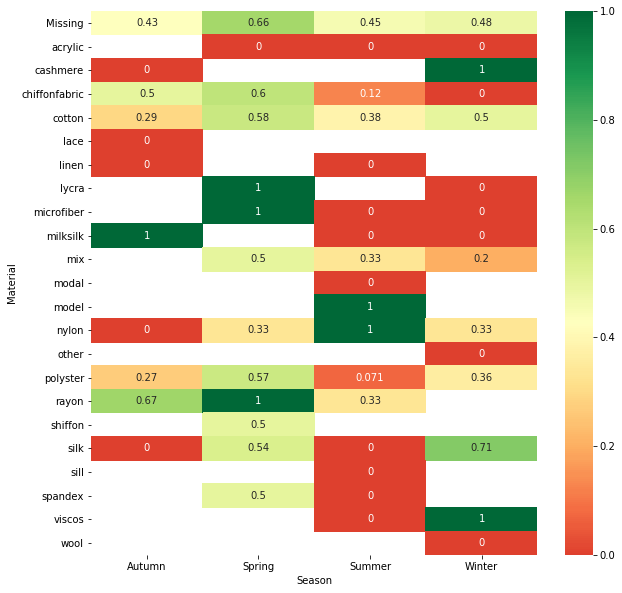

In [156]:
# plot the heat map of Season, material and Recommendation.

plt.figure(figsize=[10,10])

res = pd.pivot_table(data=inp0, index="Material", columns="Season", values="Recommendation")

sns.heatmap(res, cmap="RdYlGn", annot=True, center=0.427)

plt.show()